In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the necessary libraries

In [ ]:
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Load Images from directory and set the Labels

In [ ]:
def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
                images.append(img)
                labels.append(label)
    return images, labels

In [ ]:
benign_dir = r"/content/drive/MyDrive/Research Projects/Lung Cancer/The IQ-OTHNCCD lung cancer Original dataset/Benign"
malignant_dir = r"/content/drive/MyDrive/Research Projects/Lung Cancer/The IQ-OTHNCCD lung cancer Original dataset/Malignant"
normal_dir = r"/content/drive/MyDrive/Research Projects/Lung Cancer/The IQ-OTHNCCD lung cancer Original dataset/Normal"

In [ ]:
benign_images, benign_labels = load_images_from_dir(benign_dir, label=0)  # Assign label 0 for benign cases
malignant_images, malignant_labels = load_images_from_dir(malignant_dir, label=1)  # Assign label 1 for malignant cases
normal_images, normal_labels = load_images_from_dir(normal_dir, label=2)  # Assign label 2 for normal cases

In [ ]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

## Train Test and Split

In [ ]:
# Convert lists to numpy arrays and reshape for CNN input
X = np.array(images)
X = X.reshape(-1, 128, 128, 1)  # Reshape to (samples, height, width, channels)
y = np.array(labels)

# Now do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualization

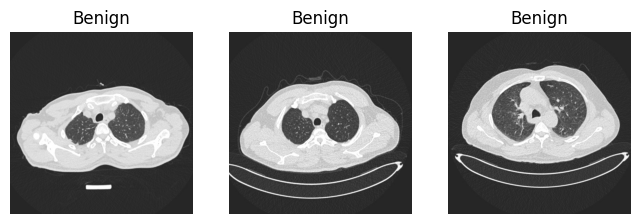

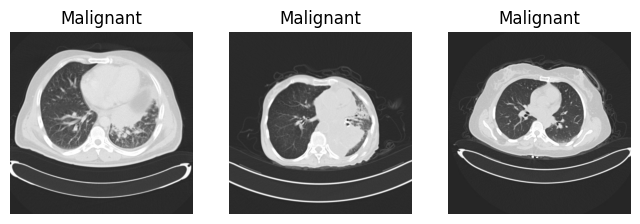

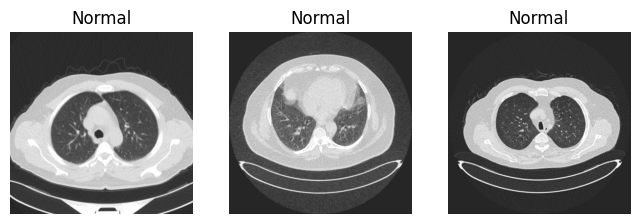

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Define the categories and their corresponding image paths
categories = {
    "Benign": benign_dir,
    "Malignant": malignant_dir,
    "Normal": normal_dir
}

# Iterate over categories
for category, image_dir in categories.items():
    # Load images from the directory
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

    # Create subplots for each category
    fig, ax = plt.subplots(1, 3, figsize=(8, 8))
    ax = ax.ravel()

    # Randomly sample 3 images from each category
    for i, img_path in enumerate(np.random.choice(image_paths, size=3, replace=False)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(category)

    plt.show()

In [ ]:
# Create a DataFrame with the counts of each category
count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [len(benign_images), len(malignant_images), len(normal_images)]
})

# Create histogram using Plotly Express
fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")

# Show the histogram
fig.show()

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define the input layer
inputs = Input(shape=(128, 128, 1))

# Define the model architecture
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [ ]:
# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

# Now you can check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Shape of X_train: (877, 128, 128, 1)
Shape of y_train_encoded: (877, 3)
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4842 - loss: 98.4852 - val_accuracy: 0.7784 - val_loss: 0.6705
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7548 - loss: 0.6185 - val_accuracy: 0.8466 - val_loss: 0.4405
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8436 - loss: 0.3791 - val_accuracy: 0.9034 - val_loss: 0.2921
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9199 - loss: 0.2229 - val_accuracy: 0.9375 - val_loss: 0.2560
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9143 - loss: 0.2587 - val_accuracy: 0.9489 - val_loss: 0.1647
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9528 - loss: 0.1314 - val_accuracy: 0.9545 - val_loss: 0.1493
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9613 - loss: 0.1248 - val_accuracy: 0.9716 - val_loss: 0.0929
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def history_plot(history):
    epochs = len(history.history['accuracy'])
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["accuracy"], name="Training Accuracy"))
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_accuracy"], name="Validation Accuracy"))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["loss"], name="Training Loss"))
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_loss"], name="Validation Loss"))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
    fig2.show()

history_plot(history)

In [ ]:
y_test_encoded = to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.9365 - loss: 0.3630
Test Loss: 0.24861444532871246
Test Accuracy: 0.949999988079071


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step


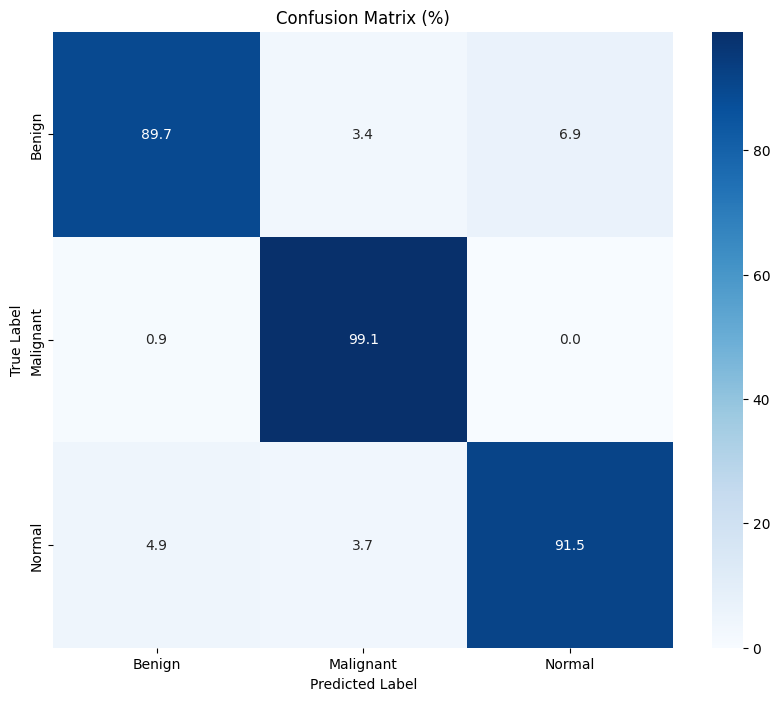

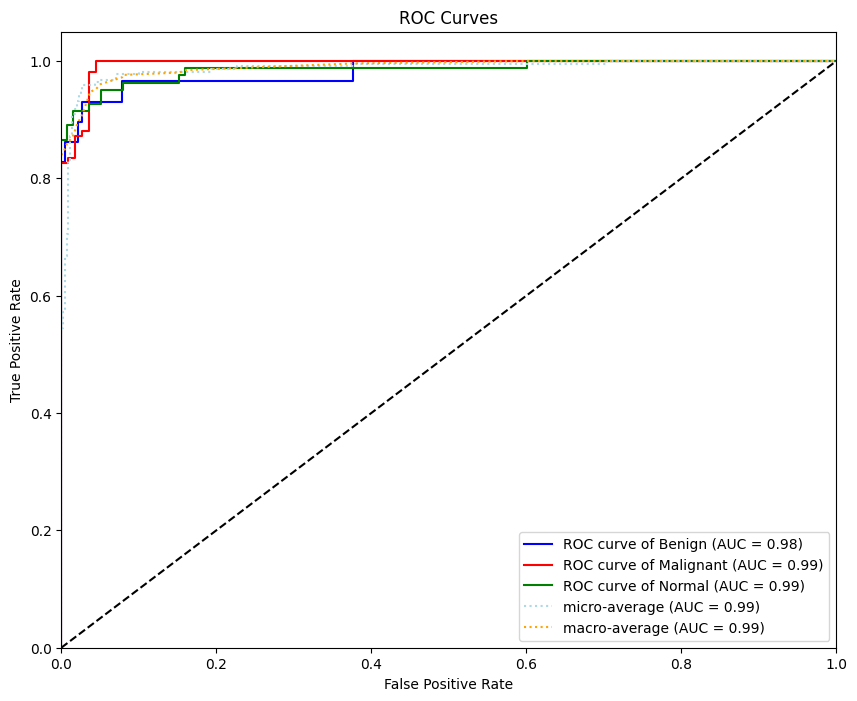

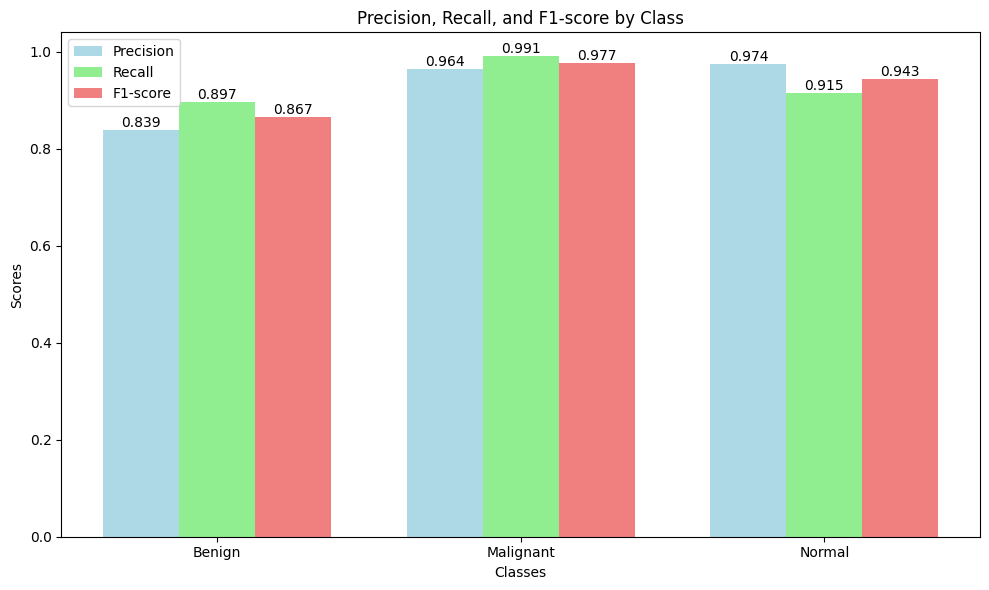

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Get model predictions if you haven't already
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# 1. Confusion Matrix Plot
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(conf_matrix_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=['Benign', 'Malignant', 'Normal'],
            yticklabels=['Benign', 'Malignant', 'Normal'])
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. ROC Curves
plt.figure(figsize=(10, 8))
class_names = ['Benign', 'Malignant', 'Normal']
colors = ['blue', 'red', 'green']
for i, (name, color) in enumerate(zip(class_names, colors)):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'ROC curve of {name} (AUC = {roc_auc:.2f})')

# Calculate micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_encoded.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, ':', color='lightblue',
         label=f'micro-average (AUC = {roc_auc_micro:.2f})')

# Calculate macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([roc_curve(y_test_encoded[:, i], y_pred[:, i])[0] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)
mean_tpr /= 3
roc_auc_macro = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, ':', color='orange',
         label=f'macro-average (AUC = {roc_auc_macro:.2f})')

plt.plot([0, 1], [0, 1], '--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# 3. Precision, Recall, and F1-score Plot
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes, average=None)

plt.figure(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.25

plt.bar(x - width, precision, width, label='Precision', color='lightblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width, label='F1-score', color='lightcoral')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score by Class')
plt.xticks(x, class_names)
plt.legend()

# Add value labels on top of each bar
for i in x:
    plt.text(i - width, precision[i], f'{precision[i]:.3f}', ha='center', va='bottom')
    plt.text(i, recall[i], f'{recall[i]:.3f}', ha='center', va='bottom')
    plt.text(i + width, f1[i], f'{f1[i]:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Research Projects/Lung Cancer/Outcome/lung_cancer_classifier_98.h5')